# 자동차 가격 분석 EDA

### 자동차 가격에 영향을 미치는 주요 특징 분석

- symboling : 자동차가 가격이 나타내는 것보다 더 위험한 정도. 자동차에는 처음에 가격과 관련된 위험 요소 기호가 할당됩니다. 그런 다음 더 위험하거나 덜 위험한 경우 이 기호를 눈금을 위(또는 아래)로 이동하여 조정합니다. 보험계리사는 이 과정을 "symboling"이라고 부릅니다.  값이 +3이면 자동차가 위험하다는 것을 나타내고 -3이면 꽤 안전할 수 있습니다.  
- normalized-losses : 보험 가입 차량 연도당 상대적인 평균 손실 지불액입니다. 이 값은 특정 크기 분류(2도어, 소형, 스테이션 왜건, 스포츠/특수품 등) 내의 모든 자동차에 대해 정규화되었으며 연간 자동차당 평균 손실을 나타냅니다. 값의 범위는 65에서 256까지입니다. 
- bore : 피스톤의 직경  
- stroke : 피스톤이 상하로 운동할 수 있는 거리
- 나머지 feature 는 이름 그대로 이해

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (4, 3)

In [2]:
df = pd.read_csv("data/clean_df.csv", index_col=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,Medium,0,1,1,0,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,Medium,0,1,1,0,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,26,Medium,0,1,1,0,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,30,Medium,0,1,1,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,22,Medium,0,1,1,0,1,0,1,0


## 시각화 도구를 사용하여 개별 feature의 패턴 분석

### 올바른 시각화 방법을 선택하는 요령 

개별 변수를 시각화 할 때, 다루는 변수의 유형을 먼저 이해하는 것이 중요합니다. 이렇게하면 해당 변수에 대해 올바른 시각화 방법을 찾을 수 있습니다.

각 column 의 type 조회

In [3]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg           float64
price                 float64
city-L/100km          float64
highway-L/100km         int64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-gas           int64
aspiration-std          int64
aspiration-turbo        int64
aspiration-std.1        int64
aspiration-turbo.1      int64
aspiration

## Pearson Correlation 분석

Pearson Correlation은 두 변수 X와 Y 간의 선형 의존성을 측정합니다.
결과 계수는 -1과 1 사이의 값이며 다음과 같습니다.
- **1** : 전체 양의 선형 상관 관계,
- **0** : 선형 상관 관계 없음, 두 변수는 서로 영향을주지 않음
- **- 1** : 총 음의 선형 상관 관계.

Pearson Correlation은 `corr()` 함수의 기본 메소드입니다.   

자동차 가격과 다른 특성간의 상관 관계를 알고 싶은 것이므로 `price` column을 맨 처음으로 가져오는 DataFrame을 구성합니다.

In [4]:
column_list = list(df.columns)
column_list.remove('price')

In [5]:
data = df[['price'] + column_list].corr()
data

,price,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
price,1.000000,-0.082391,0.133999,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.543155,...,0.789898,-0.704692,0.110326,-0.110326,-0.179578,0.179578,-0.179578,0.179578,-0.179578,0.179578
symboling,-0.082391,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.066171,0.036233,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,0.133999,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.238567,-0.181877,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911,0.006911,-0.006911
wheel-base,0.584642,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.476153,-0.543304,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889,-0.256889,0.256889
length,0.690628,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.657373,-0.698142,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085,-0.230085,0.230085
width,0.751265,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.673363,-0.680635,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732,-0.305732,0.305732
height,0.135486,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,0.003811,-0.104812,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336,-0.090336,0.090336
curb-weight,0.834415,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.785353,-0.794889,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955,-0.321955,0.321955
engine-size,0.872335,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.745059,-0.679571,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040,-0.110040,0.110040
bore,0.543155,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.554610,-0.591309,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816,-0.227816,0.227816


자동차 가격과 상관 관계 높은 feature를 탐색하기 위해 첫번째 row를 내림차순으로 sort 합니다.

In [1]:
data = data.iloc[0, :].sort_values(ascending=False)
data

NameError: name 'data' is not defined

상관 관계가 높은 상위 10개의 특성은 다음과 같습니다.

In [7]:
top10_features = data.iloc[0,:].index[1:11]
top10_features

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke'],
      dtype='object')

top 10 feature 들은 price와의 양의 상관 관계가 높으므로 price 예측의 좋은 특성으로 보입니다.

이번에는 자동차 가격과 음의 상관 관계를 가진 특성들을 골라 봅니다.

In [8]:
data.iloc[0, :].sort_values()

highway-L/100km      -0.704692
highway-mpg          -0.704692
city-mpg             -0.686571
aspiration-std.1     -0.179578
aspiration-std       -0.179578
aspiration-std.2     -0.179578
fuel-type-gas        -0.110326
peak-rpm             -0.101616
symboling            -0.082391
compression-ratio     0.071107
stroke                0.082269
fuel-type-diesel      0.110326
normalized-losses     0.133999
height                0.135486
aspiration-turbo.2    0.179578
aspiration-turbo.1    0.179578
aspiration-turbo      0.179578
bore                  0.543155
wheel-base            0.584642
length                0.690628
width                 0.751265
city-L/100km          0.789898
horsepower            0.809575
curb-weight           0.834415
engine-size           0.872335
price                 1.000000
Name: price, dtype: float64

높은 음의 상관 관계를 가진 10 개의 특성을 고릅니다.

In [9]:
low10_features = data.iloc[0, :].sort_values().index[:10]
low10_features

Index(['highway-L/100km', 'highway-mpg', 'city-mpg', 'aspiration-std.1',
       'aspiration-std', 'aspiration-std.2', 'fuel-type-gas', 'peak-rpm',
       'symboling', 'compression-ratio'],
      dtype='object')

low 10 feature들은 price 와 역의 관계가 있으므로 역시 price 예측에 도움되는 특성으로 보입니다.

## 연속 수치 변수 (Continuous numerical variables) 분석

연속 수치 변수는 어떤 범위 내의 모든 값을 포함 할 수있는 변수입니다. 연속적인 숫자 변수는 "int64"또는 "float64"유형을 가질 수 있습니다. 이러한 변수를 시각화하는 가장 좋은 방법은 맞는 선이있는 산점도를 사용하는 것입니다.

개별 변수와 가격 간의 (선형) 관계를 이해하기 위해, "regplot"을 사용할 수 있습니다.이 "regplot"은 산점도와 데이터에 대한 적합한 회귀 선을 플롯합니다.

### 양의 선형 관계

"engine-size" 와 "price" 간의 산점도 작성

<AxesSubplot:xlabel='engine-size', ylabel='price'>

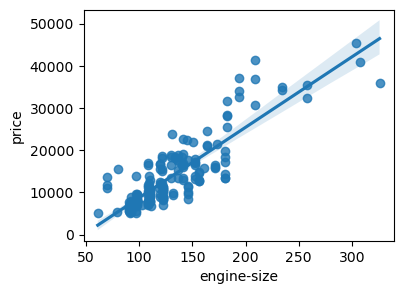

In [10]:
sns.regplot(x="engine-size", y="price", data=df)

엔진 크기가 올라감에 따라 가격이 상승합니다. 이는이 두 변수 간의 직접적인 긍정적 상관 관계를 나타냅니다. 회귀 직선은 거의 완벽한 대각선이므로 엔진 크기는 가격의 좋은 예측 인자로 보입니다.

In [11]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


'engine-size'와 'price'사이의 상관 관계를 조사하여 대략 0.87임을 알 수 있습니다. 매우 높은 양의 상관 관계를 갖습니다.

### 음의 선형 관계

highway-mpg는 low10_feature에 속하는 가격의 잠재적 예측 변수입니다.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

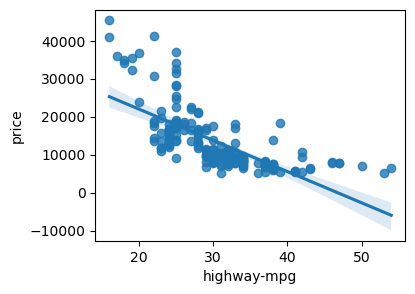

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)

고속도로 연비 (mpg)가 올라감에 따라 가격이 내려갑니다. 이는이 두 변수 사이의 역 / 음의 관계를 나타냅니다. 하이웨이 mpg는 잠재적으로 가격의 예측 변수가 될 수 있습니다.

In [13]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


'highway-mpg'와 'price'사이의 상관 관계를 살펴보면 약 -0.704가됩니다. 매우 높은 음의 상관 관계를 갖습니다.

### 약한 선형 관계

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

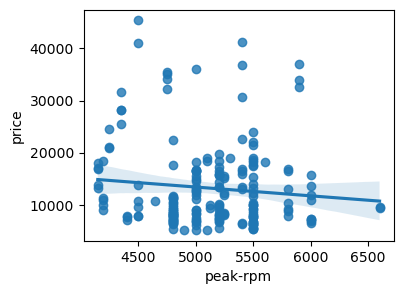

In [14]:
sns.regplot(x="peak-rpm", y="price", data=df)

회귀 직선이 수평에 가깝기 때문에 `peak_rpm` 은 가격의 좋은 예측 지표로 보이지 않습니다. 또한 데이터 포인트가 매우 흩어져 있고 fitting 라인에서 멀리 떨어져있어 많은 변동성을 보여줍니다. 따라서 신뢰할 수있는 변수는 아닙니다.

In [15]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


상관 관계가 -0.1로 높지 않음을 알 수 있습니다.

`stroke`와 `price`의 선형 관계를 시각화 해 보니다.

<AxesSubplot:xlabel='stroke', ylabel='price'>

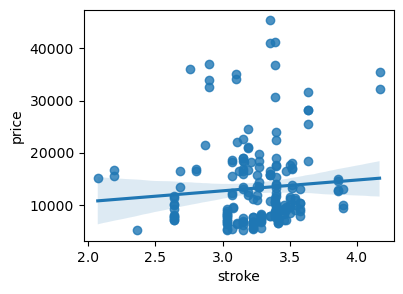

In [16]:
sns.regplot(x="stroke", y="price", data=df)

In [17]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


- stroke는 가격과의 상관 관계가 매우 약함을 알 수 있습니다.

## 범주형 변수 분석

- 범주형 변수는 `object` 또는 `int64` 유형을 가질 수 있습니다.  
- 범주형 변수를 시각화하는 좋은 방법은 상자 그림을 사용하는 것입니다.

<AxesSubplot:xlabel='body-style', ylabel='price'>

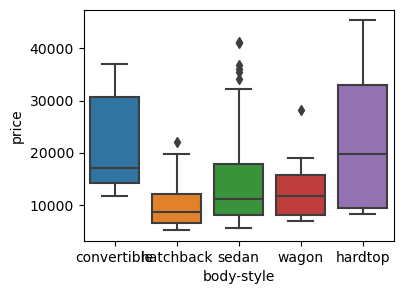

In [18]:
sns.boxplot(x="body-style", y="price", data=df)

우리는 서로 다른 body style 범주 사이의 가격 분포가 중첩되어 있으므로 body-style 이 가격의 좋은 예측 변수가되지는 않을 것이라고 봅니다. 

`engine-location`과 `price` 사이의 관계를 살펴 보겠습니다.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

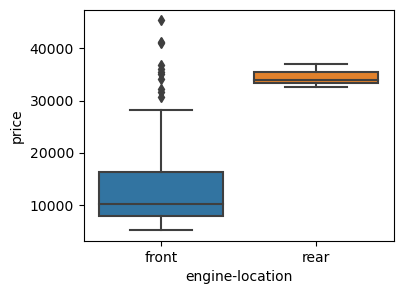

In [36]:
sns.boxplot(x="engine-location", y="price", data=df)

`front`와 `rear`의 두 엔진 위치 카테고리 사이의 가격 분배가 엔진 위치를 가격의 잠재적 인 좋은 예측 변수로 사용할 수있을 만큼 명확하다는 것을 알 수 있습니다.

` drive-wheels`와 `price` 사이의 관계를 살펴 보겠습니다.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

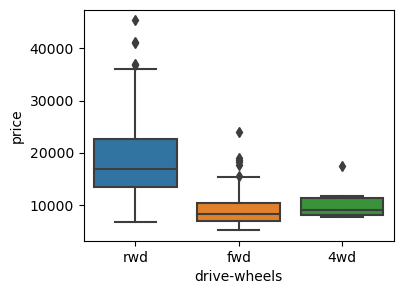

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=df)

다른 `drive-wheels` 범주 사이의 가격 분배가 다르다는 것을 알 수 있습니다. 이와 같이 drive-wheels은 잠재적으로 가격의 예측 변수가 될 수 있습니다.

## 3. 기술적 통계 분석(Descriptive Statistical Analysis)

- describe() 함수는 모든 연속 변수에 대한 기본 통계를 자동으로 계산합니다. 이 통계에서는 모든 NaN 값을 자동으로 건너 뜁니다.

- 다음과 같이 표시됩니다.
    - 그 변수의 카운트
    - 평균
    - 표준 편차 (표준 편차)
    - 최소치
    - IQR (사분위수 범위 : 25 %, 50 % 및 75 %)
    - 최대치

수치 변수의 기술 통계

In [39]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,9.944145,30.686567,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,2.534599,6.815150,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4.795918,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,7.833333,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,9.791667,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,12.368421,34.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,18.076923,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 category 변수의 기술 통계

In [40]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,115


DataFrame의 범주형 변수가 모두 출력 되었는지 확인합니다.

In [41]:
df.dtypes[df.dtypes == 'object']

make                 object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
engine-type          object
num-of-cylinders     object
fuel-system          object
horsepower-binned    object
dtype: object

### Value Counts

각 column의 unique한 value 갯수를 파악합니다.

In [42]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

전륜구동, 후륜구동에 비해 4륜 구동차의 sample 숫자가 크게 적음을 알 수 있습니다. 데이터가 매우 편향되어 있습니다.

In [43]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

엔진위치 data는 크게 편향되어 있어 왜곡 된 결과가 발생할 수 있으므로 엔진 위치와 가격간의 상관 관계에 대해 결론을 내릴 수는 없습니다. 따라서 `engine-location`은 자동차 가격 예측의 좋은 feature 가 아닙니다.

## Grouping

- 유형별로 그룹화 하여 평균 계산

In [44]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

평균적으로 어떤 유형의 드라이브 휠이 가장 가치 있는지 알고 싶다면 'drive-wheels'를 그룹화 한 다음 평균을 낼 수 있습니다.

In [61]:
df_group_1 = df[['drive-wheels',  'price']]
df_group_1.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


In [62]:
df_group_one.groupby('drive-wheels').mean()

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


후륜 구동 차량은 평균적으로 가장 비싸지만 4 륜구동이나 전륜 구동은 가격면에서 거의 동일하다는 것을 알 수 있습니다.

In [63]:
df_group_2 = df[['body-style',  'price']]
df_group_2.head()

,body-style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [64]:
df_group_2.groupby('body-style').mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


`body-style`에 따른 가격 차이가 2 배 이상인 것을 알 수 있습니다.

동일한 요령으로 다른 변수들도 자동차 가격 예측에 도움이 되는지 파악합니다.

### 결론

- 35개의 feature 중 가격 결정에 도움이 될 top10_features, low10_features 연속 변수와 category 변수 중 `drive-wheels`, `body-style` 을  machine learning 에 사용할 최종 feature로 결정합니다.

In [65]:
df.shape

(201, 35)

최종 선정된 feature들로 구성된 final DataFrame을 생성합니다.

In [66]:
final_df = df[list(top10_features) + list(low10_features) + ['drive-wheels', 'body-style']]
final_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-mpg,aspiration-std.1,aspiration-std,aspiration-std.2,fuel-type-gas,peak-rpm,symboling,compression-ratio,drive-wheels,body-style
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,21,1,1,1,1,5000.0,3,9.0,rwd,convertible
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,21,1,1,1,1,5000.0,3,9.0,rwd,convertible
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,19,1,1,1,1,5000.0,1,9.0,rwd,hatchback
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,24,1,1,1,1,5500.0,2,10.0,fwd,sedan
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,18,1,1,1,1,5500.0,2,8.0,4wd,sedan


In [67]:
final_df.shape

(201, 22)

이제 머신 러닝을 위한 데이터의 EDA 가 완료 되었습니다.